In [22]:
library(stringr)
library(ggplot2)
library(ggstats)
library(cowplot)
library(stringr)
library(Seurat)
library(ggpubr)
library(ggsci)
library("RColorBrewer")

scanpy2seurat <- function(file_name){
  h5ad=paste0('/sc/arion/projects/CommonMind/roussp01a/ENT/snRNAseq/qc_scanpy/',file_name,'.h5ad')
  rds=paste0('/sc/arion/projects/CommonMind/roussp01a/ENT/snRNAseq/qc_scanpy/',file_name,'.rds')
  ent = schard::h5ad2seurat(h5ad)
  saveRDS(ent,rds)
}

read_obj <- function(file_name, hvg){
  ent_N <- readRDS(paste0('/sc/arion/projects/CommonMind/roussp01a/ENT/snRNAseq/qc_scanpy/',file_name,'.rds'))
  names(ent_N@reductions) <- gsub('^X|_$','',names(ent_N@reductions))
  ent_N <- FindVariableFeatures(ent_N,nfeatures = hvg) # for identify DEGs using slingshot
  return(ent_N)
}


N_color <- c('#1f77b4',"#ea801c","#D32B29")#,"#298c8c"
names(N_color) <- c('GBC','iOSN','mOSN')

N_stage_color <- c('#1f77b4','#FDBF6F','#ff7f0e',"#D32B29")
names(N_stage_color) <- c('GBC','e_iOSN','l_iOSN','mOSN')


scanpy2seurat('ent_N_cluster_rawcount')
ent_N <- read_obj('ent_N_cluster_rawcount', hvg = 3000)

In [23]:
brewer.pal(12,"Paired")

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F"
 [8] "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"

In [28]:
site <- c('Set1'='L_ST','Set2'='R_ST','Set3'='L_MT','Set4'='R_MT','Set5'='L_SS','Set6'='R_SS')
ent_N$Site_side <- as.character(site[ent_N$Set])
ent_N$Site_side <- factor(ent_N$Site_side, levels = c('L_SS','R_SS','L_ST','R_ST','L_MT','R_MT'))
ent_N$Site <- factor(str_split(ent_N$Site_side,'_',simplify = T )[,2], levels = c('SS','ST','MT'))

ent_doner = read.csv('/sc/arion/projects/roussp01a/liting/Olf/doner_ent.csv', row.names = 1)
ent_N$set_sub=paste0(ent_N$set , ent_N$SubID_vs)
ent_N$samp_don <- ent_doner[ent_N$set_sub,'samp_don' ]


p1 <- DimPlot(ent_N,  split.by = "donor_name",group.by = 'N_types',cols=N_color)+theme(aspect.ratio = 1)+ggtitle('Doner')
p2 <- DimPlot(ent_N,  split.by = "Site_side",group.by = 'N_types',cols=N_color)+theme(aspect.ratio = 1)+ggtitle('Site')

pdf(file = "/sc/arion/projects/roussp01a/liting/Olf/figures/1_ENT_Neuro_UMAP_bySiteDoner.pdf", width = 10, height = 6)
plot_grid(plot_grid(p1,p2,nrow=2,align = 'hv',axis='tblr'))
dev.off()

metadata_N <- ent_N@meta.data
metadata_N$Proj <- 'ENT'

p1 <- ggplot(metadata_N) +
  aes(x = Proj, fill = N_types) +
  geom_bar(position = "fill") +
  scale_fill_manual(values=N_color)+
  geom_text(stat = "prop", position = position_fill(.5),color='white')+theme_void()+
labs(fill='Cell types') # +theme(legend.position = 'top')
#coord_polar("y", start=0) + 
#ggtitle(paste0("n = ",nrow(metadata_N)))

# p2 <- ggplot(metadata_N) +
#   aes(x = Proj, fill = Site) +
#   geom_bar(position = "fill") +
#   scale_fill_manual(values=c('#a00000','#ffbb6f','#999999'))+
#   geom_text(stat = "prop", position = position_fill(.5))+coord_polar("y", start=0) + theme_void() #+theme(legend.position = 'top')
# 

p2 <- ggplot(metadata_N) +
  aes(x = Proj, fill = Site) +
  geom_bar(position = "fill") +
  scale_fill_manual(values=c('#a00000','#c46666','#d8a6a6'))+
  geom_text(stat = "prop", position = position_fill(.5), color='white')+
#coord_polar("y", start=0) + 
theme_void() #+theme(legend.position = 'top')



p3 <- ggplot(metadata_N, aes(x=donor_name, fill=Site))+
  geom_bar(stat='count')+#scale_fill_manual(values = brewer.pal(n = 12, name = 'Paired'))+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1,vjust = 1))


p4 <- ggplot(metadata_N, aes(x=donor_name, fill=Set))+
  geom_bar(stat='count')+scale_fill_manual(values = brewer.pal(n = 12, name = 'Paired')[c(1:6)])+
  theme_bw()+facet_wrap('~N_types',nrow=1)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1,vjust = 1))


pdf(file = "/sc/arion/projects/roussp01a/liting/Olf/figures/1_ENT_Neuro_prop.pdf", width = 3.5, height = 3.5)
#plot_grid(plot_grid(p1,p2,nrow=2,align = 'hv',axis='tblr'),p3,nrow=1)
#plot_grid(plot_grid(p1,p2,nrow=2,align = 'hv',axis='tblr'),p4,nrow=1)
plot_grid(plot_grid(p1,p2,nrow=1,align = 'hv',axis='tblr'))
dev.off()

pdf 
  2

pdf 
  2

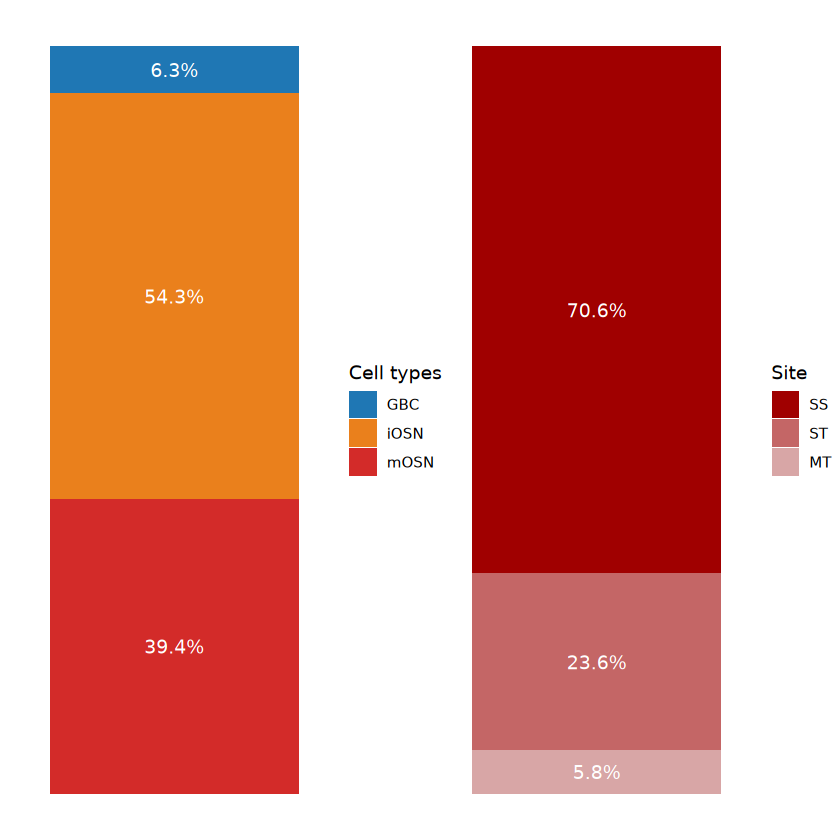

In [25]:
p1+p2

pdf 
  2

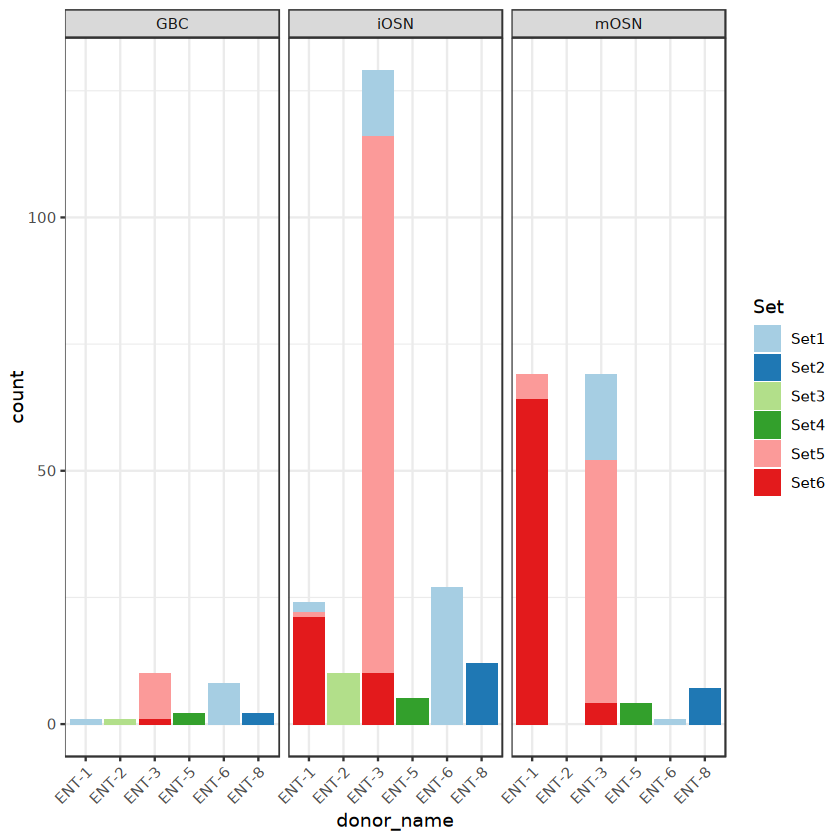

In [26]:
p4
dev.print(pdf, file = "/sc/arion/projects/roussp01a/liting/Olf/figures/1_ENT_Neuro_prop.pdf", width = 5, height = 5)


In [32]:
# cell cycle
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

#ent_nn <- readRDS(paste0('/sc/arion/projects/CommonMind/roussp01a/ENT/snRNAseq/qc_scanpy/ent_nn_merge_v2.rds'))
ent_nn <- readRDS(paste0('/sc/arion/projects/CommonMind/roussp01a/ENT/snRNAseq/qc_scanpy/ent_nn_merge_cca.rds'))
ent_nn <- JoinLayers(ent_nn)

# intergrated data
cellcycle_entnn <- CellCycleScoring(ent_nn, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

p1 <- ggplot(cellcycle_entnn@meta.data, aes(x=factor(cca_N_types_stage,levels = c('GBC','e_iOSN','l_iOSN','mOSN')),fill=Phase))+
  geom_bar(position = "fill",width=0.5)+
  #facet_wrap(~dataset)+
  scale_y_continuous(labels = scales::percent)+
  ylab('Proportion')+xlab('')+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
       legend.position='bottom')+
  scale_fill_nejm()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

p2 <- ggplot(cellcycle_entnn@meta.data, aes(x=factor(cca_N_types_stage,levels = c('GBC','e_iOSN','l_iOSN','mOSN')),fill=Phase))+
  geom_bar(position = "fill",width=0.6)+
  facet_wrap(~dataset)+
  scale_y_continuous(labels = scales::percent)+
  ylab('Proportion')+xlab('')+theme_bw()+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), aspect.ratio = 1)+
  scale_fill_nejm()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())


ggsave(p1, file='/sc/arion/projects/roussp01a/liting/Olf/figures/cellcycle_phase_merge.pdf',width = 2.8, height =4 )
ggsave(p2, file='/sc/arion/projects/roussp01a/liting/Olf/figures/cellcycle_phase_dataset.pdf',width = 6, height =4 )

# 
# p3 <- ggplot(cellcycle_entnn@meta.data, aes(x=factor(cca_N_types_stage,levels = c('GBC','e_iOSN','l_iOSN','mOSN')),y=S.Score,color=cca_N_types_stage))+geom_boxplot(width=0.6) + facet_wrap(~dataset)+
#   scale_color_manual(values=N_stage_color)+theme_bw()+theme(legend.position = '')+xlab('')+
#   ggsignif::geom_signif(comparisons = list(c("GBC", "iOSN"),c("GBC", "mOSN"),c('iOSN','mOSN')),test = 'wilcox.test',step_increase = 0.1)+
#   theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), aspect.ratio = 1)+
#   scale_fill_nejm()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
# ggsave(p3,file = "/sc/arion/projects/roussp01a/liting/Olf/figures/entnn_S.Score.pdf", width = 5, height = 4)


p4 <- ggplot(cellcycle_entnn@meta.data, aes(x=factor(cca_N_types_stage,levels = c('GBC','e_iOSN','l_iOSN','mOSN')),y=G2M.Score, color=cca_N_types_stage))+
  geom_boxplot(width=0.6) + #facet_wrap(~dataset)+
  scale_color_manual(values=N_stage_color)+theme_bw()+theme(legend.position = '')+xlab('')+
  ggsignif::geom_signif(comparisons = list(c("GBC", "mOSN"),c("GBC", "l_iOSN"),c('GBC','e_iOSN')),
                        test = 'wilcox.test',step_increase = 0.1)+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), aspect.ratio = 1)+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
ggsave(p4,file = "/sc/arion/projects/roussp01a/liting/Olf/figures/entnn_gG2M.Score.pdf", width = 5, height = 4)



# # ent data
# cellcycle_ent <- CellCycleScoring(ent_N, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
# 
# ggplot(cellcycle_ent@meta.data, aes(x=N_types,fill=Phase))+
#   geom_bar(position = "fill")+
#   scale_y_continuous(labels = scales::percent)+
#   ylab('Proportion')+xlab('')+theme_bw()+theme(aspect.ratio = 1)
# 
# ggplot(cellcycle_ent@meta.data, aes(x=N_types,y=S.Score,color=N_types))+geom_boxplot() + 
#   scale_color_manual(values=N_color)+theme_bw()+theme(legend.position = '')+
#   ggsignif::geom_signif(comparisons = list(c("GBC", "iOSN"),c("GBC", "mOSN")),test = 'wilcox.test',step_increase = 0.1)
# 
# ggplot(cellcycle_ent@meta.data, aes(x=N_types,y=G2M.Score, color=N_types))+geom_boxplot() + 
#   scale_color_manual(values=N_color)+theme_bw()+theme(legend.position = '')+
#   ggsignif::geom_signif(comparisons = list(c("GBC", "iOSN"),c("GBC", "mOSN")),test = 'wilcox.test',step_increase = 0.1)
# 



OFR <- read.table('/sc/arion/projects/roussp01a/liting/Olf/OLR.gene.txt',sep='\t',header = T ,quote = '')
OFR <- OFR[grepl('Olfactory Receptor Family',OFR$Description),]

scanpy2seurat('ent_N_cluster_v2')
ent_N_merge <- read_scdata('ent_N_cluster_v2', hvg = 18000)


DimPlot(ent_nn)
olf_exp <- as.data.frame(t(ent_nn@assays$RNA$counts))[,intersect(OFR$Gene.Symbol,rownames(ent_nn))]
ent_nn$OFR <- ifelse(rowSums(olf_exp>0)<3, rowSums(olf_exp>0),'3+')


P1 <- ggplot(ent_nn@meta.data, aes(x=factor(cca_N_types_stage,levels = c('GBC','e_iOSN','l_iOSN','mOSN')), fill=OFR))+
  geom_bar(position = 'fill')+xlab('')+ylab('Proportion')+theme_bw()+
  scale_y_continuous(labels = scales::percent)+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
  scale_fill_nejm()

ggsave(P1,file = "/sc/arion/projects/roussp01a/liting/Olf/figures/N_olfr.pdf", width = 5, height = 4)


p2 <- ggplot(ent_nn@meta.data, aes(x=factor(cca_N_types_stage,levels = c('GBC','e_iOSN','l_iOSN','mOSN')), fill=OFR))+
  geom_bar(position = 'fill')+xlab('')+ylab('Proportion')+theme_bw()+
  facet_grid(~dataset)+
  scale_y_continuous(labels = scales::percent)+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
  scale_fill_nejm()

Warning message:
“The following features are not present in the object: CDCA7, MLF1IP, EXO1, E2F8, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HJURP, HN1, not searching for symbol synonyms”


ERROR: Error in read_scdata("ent_N_cluster_v2", hvg = 18000): could not find function "read_scdata"


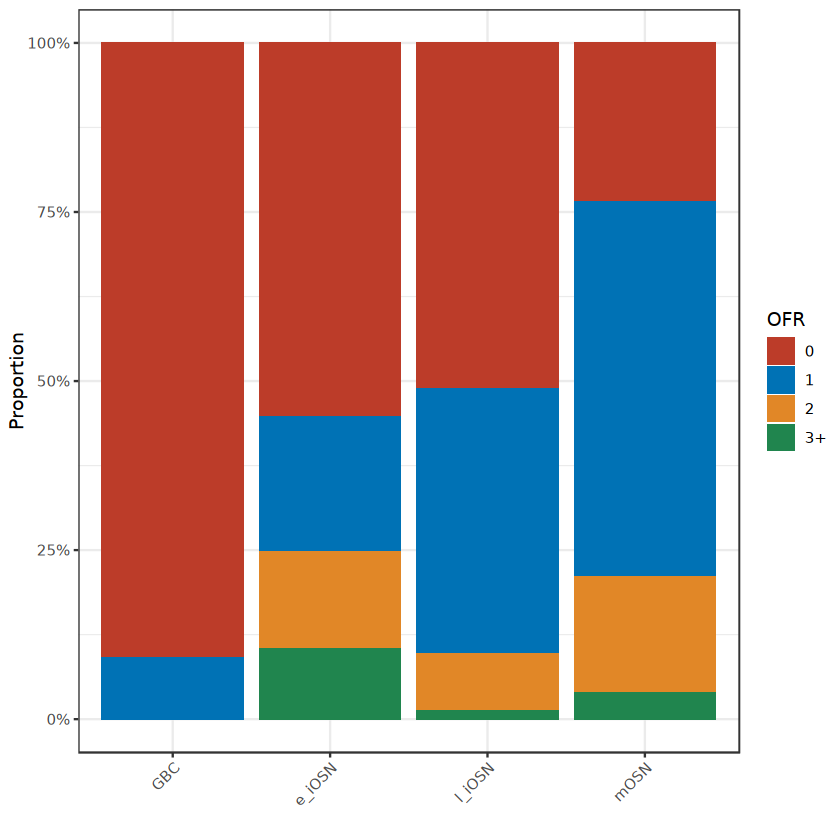

In [7]:
P1

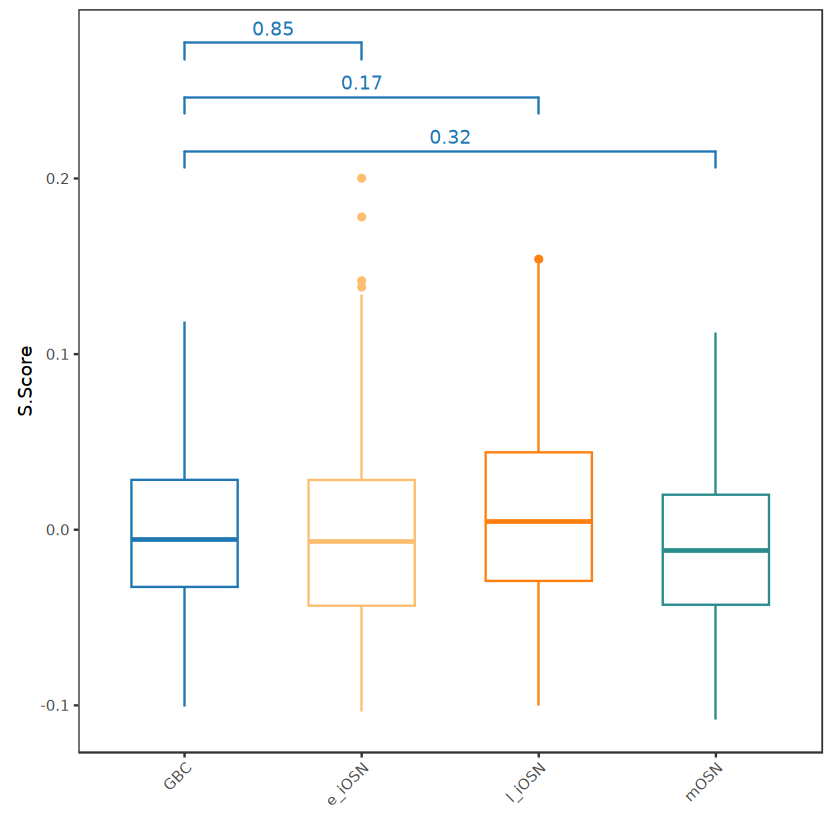

In [11]:
ggplot(cellcycle_entnn@meta.data, aes(x=factor(cca_N_types_stage,levels = c('GBC','e_iOSN','l_iOSN','mOSN')),y=S.Score, color=cca_N_types_stage))+
  geom_boxplot(width=0.6) + #facet_wrap(~dataset)+
  scale_color_manual(values=N_stage_color)+theme_bw()+theme(legend.position = '')+xlab('')+
  ggsignif::geom_signif(comparisons = list(c("GBC", "mOSN"),c("GBC", "l_iOSN"),c('GBC','e_iOSN')),test = 'wilcox.test',step_increase = 0.1)+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), aspect.ratio = 1)+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())


In [12]:
plot_cells

ERROR: Error: object 'plot_cells' not found
